In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb_data_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Facebook%20Data/pseudo_facebook.csv")
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
print(len(fb_data_df),'Total data available ')
fb_data_df.isnull().sum()

99003 Total data available 


userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [4]:
fb_data_df.dropna(how = 'any', inplace = True)

In [5]:
fb_data_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [6]:
min(fb_data_df['age']), max(fb_data_df['age'])

(13, 113)

In [7]:
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data_df['age_group'] = pd.cut(fb_data_df['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


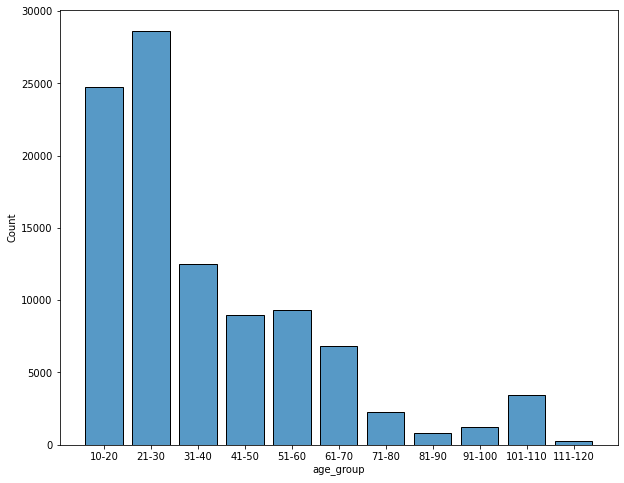

In [8]:
plt.subplots(figsize = (10,8))
sns.histplot(fb_data_df, x = 'age_group', multiple="dodge", shrink = 0.8)
plt.show()

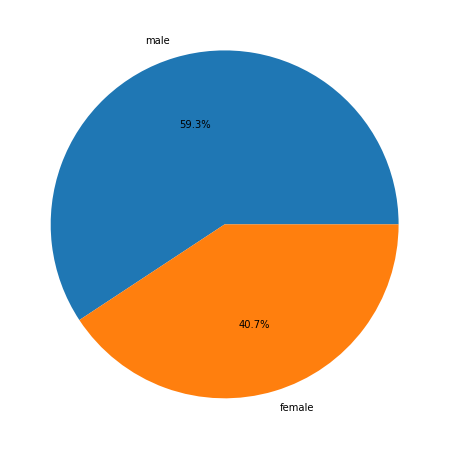

In [9]:
gender_counts = fb_data_df['gender'].value_counts()
plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()

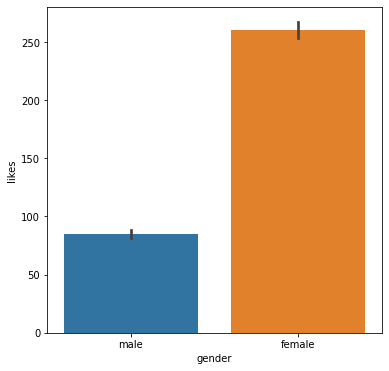

In [10]:
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes')
plt.show()

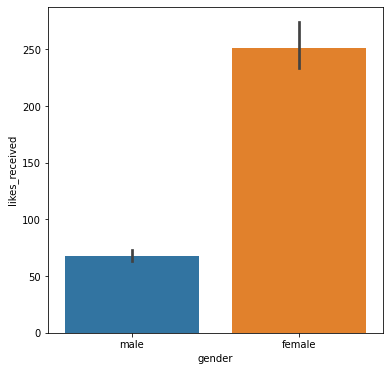

In [11]:
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes_received')
plt.show()

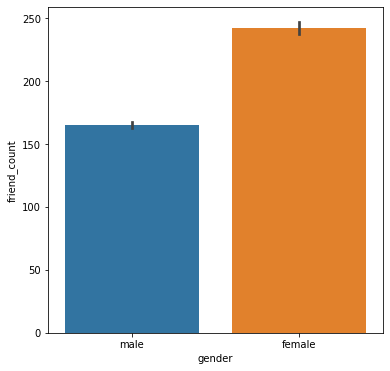

In [12]:
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friend_count')
plt.show()

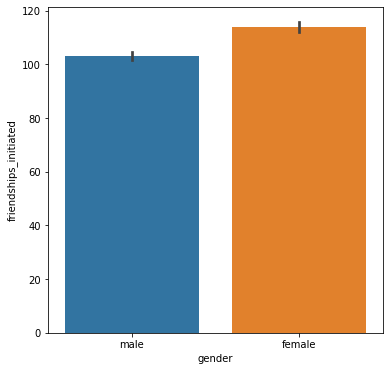

In [13]:
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friendships_initiated')
plt.show()

In [14]:
lables = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
fb_data_df['year_group'] = pd.cut(fb_data_df['tenure'], bins = np.arange(-1, 3285 + 1, 365), labels =lables)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year


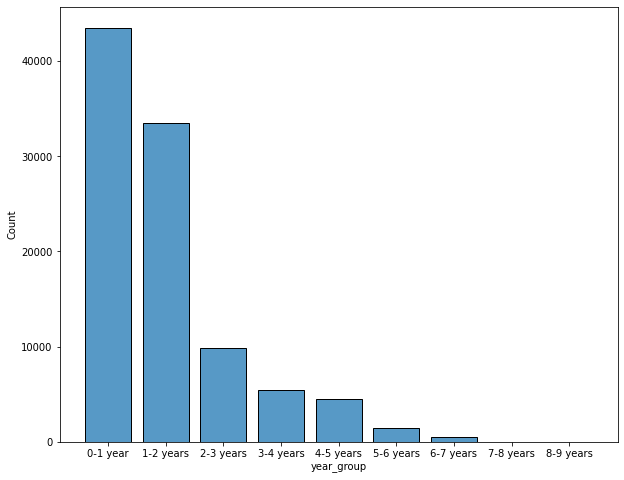

In [15]:
plt.subplots(figsize = (10,8))
sns.histplot(data = fb_data_df,x = 'year_group', multiple = 'dodge', shrink = 0.8)
plt.show()

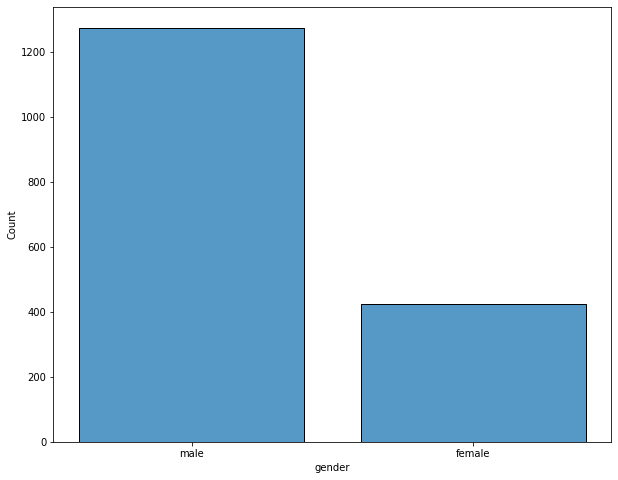

In [16]:
inactive_users = fb_data_df.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (10,8))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()

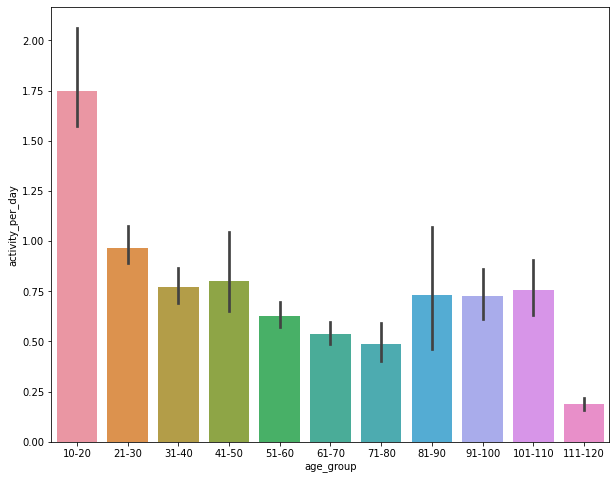

In [17]:
fb_data_df['activity_per_day'] = (fb_data_df['friendships_initiated']/fb_data_df['tenure'] + fb_data_df['likes']/fb_data_df['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'age_group',y = 'activity_per_day')
plt.show()

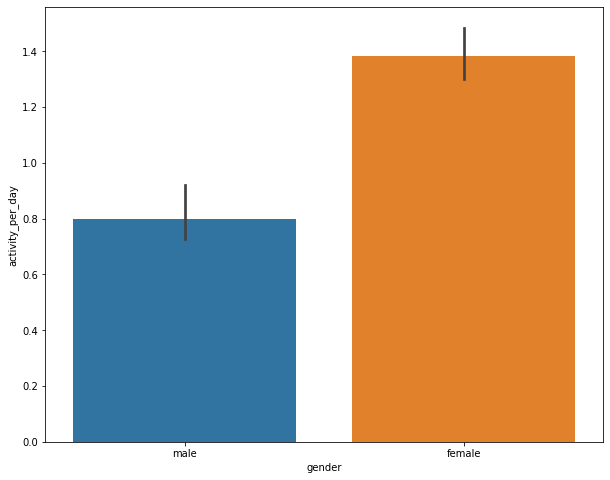

In [18]:
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'gender',y = 'activity_per_day')
plt.show()

In [19]:
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


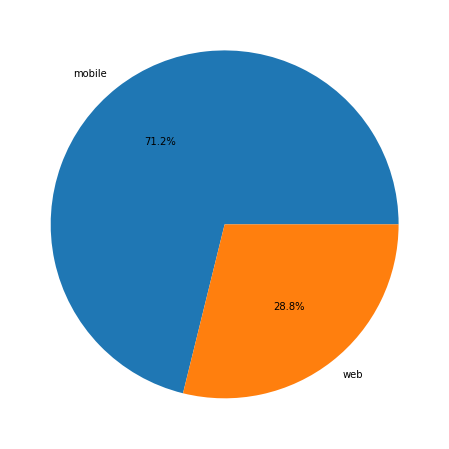

In [20]:
active_users = fb_data_df.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()